# Assignment 2

### MACS 30000, Dr. Evans
### Zeyu Xu

Due Wednesday, Oct. 17 at 11:30 AM

In [2]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. Imputing age and gender

#### (a) Here is where I will describe my proposed strategy ... and so on and so forth.

Regress 'age' and 'female' on 'weight' and 'total income' using the data from SurveyIncome.txt.
Using linear model for 'age' and logit model for 'female'.
Then use regression functions to predict 'age' and 'female' variable in BestIncome.txt.

#### (b) Here is where I'll use my proposed method from part (a) to impute variables.

In [3]:
df = pd.read_csv("SurvIncome.txt", index_col=0, header = None).reset_index()
df.columns = ['tot_inc','wgt','age','female']
df['const'] = 1
reg1 = sm.OLS(endog=df['age'],exog=df[['tot_inc','wgt','const']], missing='drop')
result1 = reg1.fit()
reg2 = sm.Logit(endog=df['female'], exog=df[['tot_inc','wgt','const']], missing='drop')
result2 = reg2.fit()
df2 = pd.read_csv("BestIncome.txt", index_col=0, header = None).reset_index()
df2.columns = ['lab_inc','cap_inc','hgt','wgt']
df2['const'] = 1
df2['tot_inc'] = df2['lab_inc']+df2['cap_inc']
df2['age'] = result1.predict(exog=df2[['tot_inc','wgt','const']])
df2['female'] = result2.predict(exog=df2[['tot_inc','wgt','const']])
df2['female'][df2['female']>=0.5] = 1
df2['female'][df2['female']<0.5] = 0

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### (c) Here is where I'll report the descriptive statistics for my new imputed variables.

In [4]:
print(df2['age'].describe())
print(df2['female'].describe())

count    10000.000000
mean        44.890828
std          0.219150
min         43.976495
25%         44.743776
50%         44.886944
75%         45.038991
max         45.703819
Name: age, dtype: float64
count    10000.000000
mean         0.454600
std          0.497959
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: female, dtype: float64


#### (d) Correlation matrix for the now six variables

In [5]:
ols_df = df2[['lab_inc','cap_inc','hgt','wgt','age','female']]
corr = ols_df.corr()
corr.style.background_gradient()

,lab_inc,cap_inc,hgt,wgt,age,female
lab_inc,1,0.0053253,0.00278978,0.00450691,0.924053,-0.215469
cap_inc,0.0053253,1,0.0215716,0.00629868,0.234159,-0.0625691
hgt,0.00278978,0.0215716,1,0.172103,-0.0450828,-0.127416
wgt,0.00450691,0.00629868,0.172103,1,-0.300288,-0.763821
age,0.924053,0.234159,-0.0450828,-0.300288,1,0.0200595
female,-0.215469,-0.0625691,-0.127416,-0.763821,0.0200595,1


### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [6]:
df3 = pd.read_csv("IncomeIntel.txt", index_col=0, header = None).reset_index()
df3.columns = ['grad_year','gre_qnt','salary_p4']
df3['const'] = 1
reg3 = sm.OLS(endog=df3['salary_p4'],exog=df3[['gre_qnt','const']], missing='drop')
result3 = reg3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        13:09:51   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

#### (b) Create a scatterplot of GRE score and graduation year. 

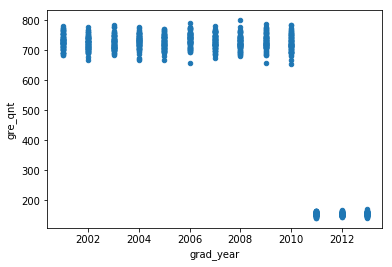

In [7]:
df3.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

Here is where I'll discuss any problems that jump out. I'll propose a solution here as well.

It shows there might be a system drift on "gre_qnt" on 2012,for all points of that year jumped from above 600 to less than 200.
One solution is to find the official mapping function from grade of old version to that of new version on ETS homepage and use that to transform the grade of old version to that of new version. Then use new data for regression.

#### (c) Create a scatterplot of income and graduation year

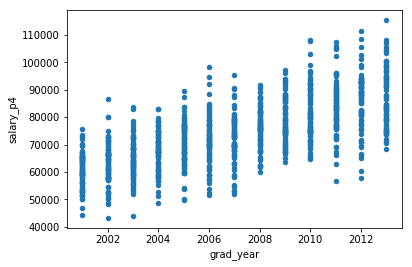

In [8]:
# Code and output of scatterplot
df3.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

Here is where I'll discuss any problems again ... and propose another solution.

There seems to be a trend for income. One way to solve that is to use 2001 as the base year and divide each year by the average growth rate raised to the t power, where t = grad_year - 2001.

#### (d) Re-estimate coefficients with updated variables.

In [11]:
# Code to re-estimate, output of new coefficients
def transform(x):
    List1 = [800, 790, 780, 770, 760, 750, 740, 730, 720, 710, 690, 680, 670, 650, 630, 620, 600, 580, 560, 540, 520, 490, 470, 450, 420, 390, 370, 340, 320, 290, 270, 250, 230, 210, 200]
    List2 = [166, 164, 163, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131]
    if x < 200:
        return x
    if x == 200:
        return 130
    for i in range(len(List2)):
        if x <= List1[i] and x > List1[i+1]:
            return List2[i]  
avg_inc_by_year = df3['salary_p4'].groupby(df3['grad_year']).mean().values
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()
df3['new_salary'] = df3['salary_p4']
df3['new_gre_qnt'] = 0
for i in range(2002, 2014):
    df3['new_salary'][df3['grad_year']==i] =  df3['salary_p4']/ ((1 + avg_growth_rate) ** (i - 2001))
for k in range(len(df3['new_gre_qnt'])):
    df3['new_gre_qnt'][k] = transform(df3['gre_qnt'][k])
reg4 = sm.OLS(endog=df3['new_salary'],exog=df3[['new_gre_qnt','const']], missing='drop')
result4 = reg4.fit()
print(result4.summary())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:             new_salary   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5576
Date:                Mon, 15 Oct 2018   Prob (F-statistic):              0.455
Time:                        13:12:37   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
new_gre_qnt   -48.8918     65.474     -0.747      

Here is where I'll discuss how the coefficients differ, where I'll interpret why the changes  result in new coefficient changes, and where I'll discuss what this suggests about the answer to the question.

The coefficient of 'new_gre_qnt' represent for by how much student's income 4 years after graduation will increase for 1 more point of GRE quantative 170-scale grade. The coefficient becomes insignificant while still negative, which is better than the siginificant negative coefficients in previous regression which is contradict to our common sense that a person getting higher quantative grade in GRE is more intelligent and thus will have higher income. It suggests we have solve the problems mentioned before, and the previous uncommon results come from system drift and time trend.

### 3. Assessment of Kossinets and Watts.

See attached PDF. 